## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1. Скачать данные в закрепе к уроку
2. Изучите стоимости недвижимости
3. Изучите распределение квадратуры жилой
4. Изучите распределение года постройки

## Условие 2: 2 задача

1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2. Изучите распределение этажей домов
3. Изучите распределение состояния домов

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### Задача 1

In [1]:
# 1.1. Скачать данные в закрепе к уроку

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


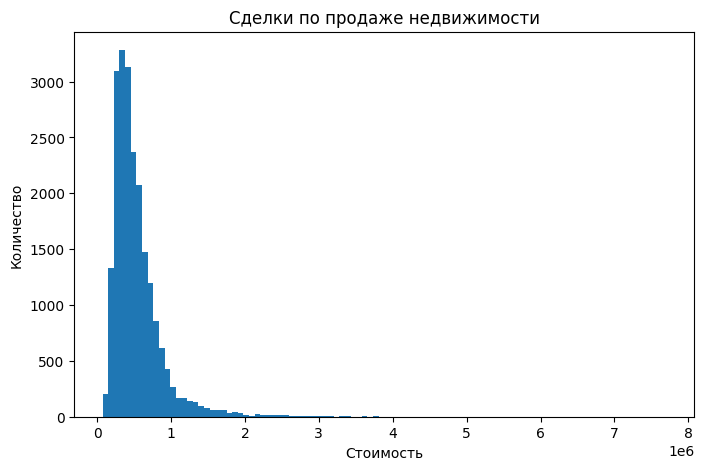

In [2]:
# 1.2. Изучите стоимости недвижимости

plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=100)
plt.title('Сделки по продаже недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

Основной объем сделок с недвижимостью в диапазоне цен от 300к до 700к.

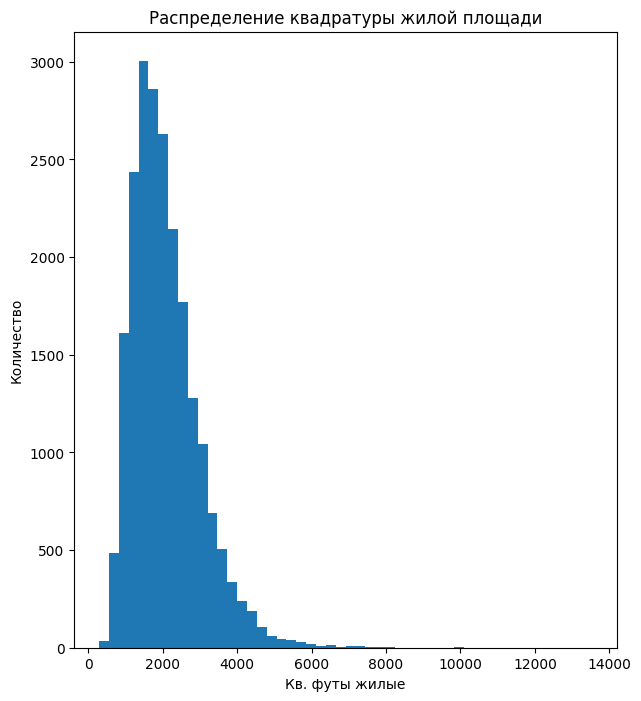

In [3]:
# 1.3. Изучите распределение квадратуры жилой

plt.figure(figsize=(7, 8))
plt.hist(df['sqft_living'], bins=50)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Кв. футы жилые')
plt.ylabel('Количество');

Самые востребованные объекты недвижимости площадью от 1000 до 3000 кв.футов. 

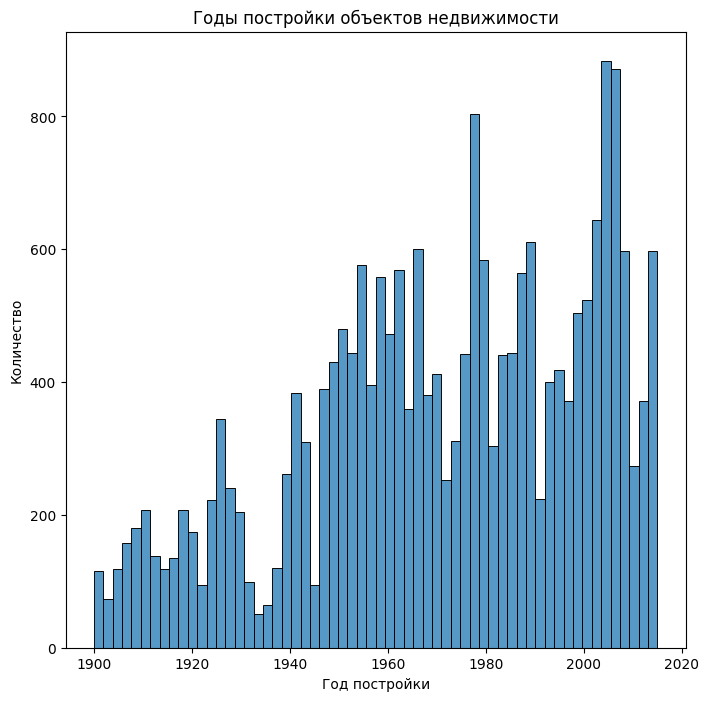

In [4]:
# 1.4. Изучите распределение года постройки
plt.figure(figsize=(8, 8))
sns.histplot(df['yr_built'], bins=60)
plt.title('Годы постройки объектов недвижимости')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Спрос на дома постройки полсе 1950 года относительно ровный, с небольшими пиками для 1979 и 2009 годов.

### Задача 2

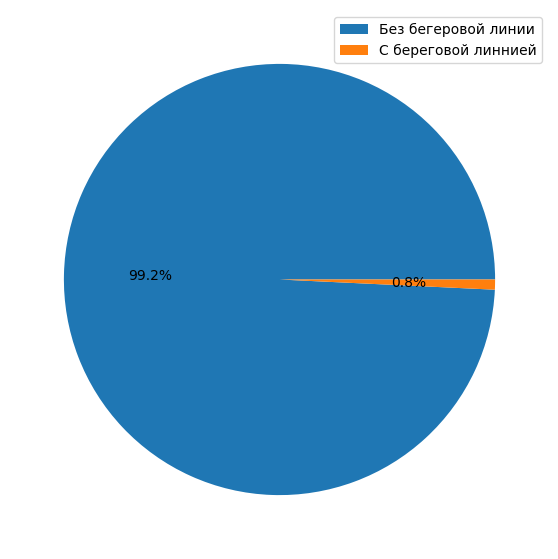

In [5]:
# 2.1 Изучите распределение домов от наличия вида на набережную

view_embankment = df['waterfront'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(view_embankment, autopct='%1.1f%%')
plt.legend(['Без бегеровой линии', 'С береговой линнией'], loc = 'best');

Абсолютное большинство объектов недвижимости без бегеровой линии. 

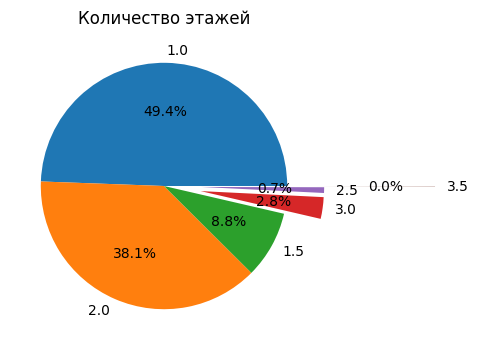

In [6]:
# 2.2 Изучите распределение этажей домов

data = df['floors'].value_counts()
expl = [0, 0 ,0, 0.3, 0.3, 1.2]
plt.figure(figsize=(6, 4))
plt.pie(data, autopct='%1.1f%%', labels=data.index, explode= expl)
plt.title('Количество этажей');

Самыми популярными являются одно и двух этажные дома. 

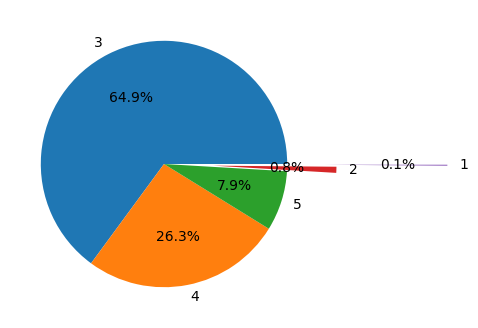

In [9]:
# 2.2 Изучите распределение состояния домов

data2 = df['condition'].value_counts()
expl2 = [0, 0, 0 ,0.4, 1.3]
plt.figure(figsize=(6, 4))
plt.pie(data2, autopct='%1.1f%%', labels=data2.index, explode=expl2);

Основная часть объектов недвижимости имеет удовлетворительно состояние.

### Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

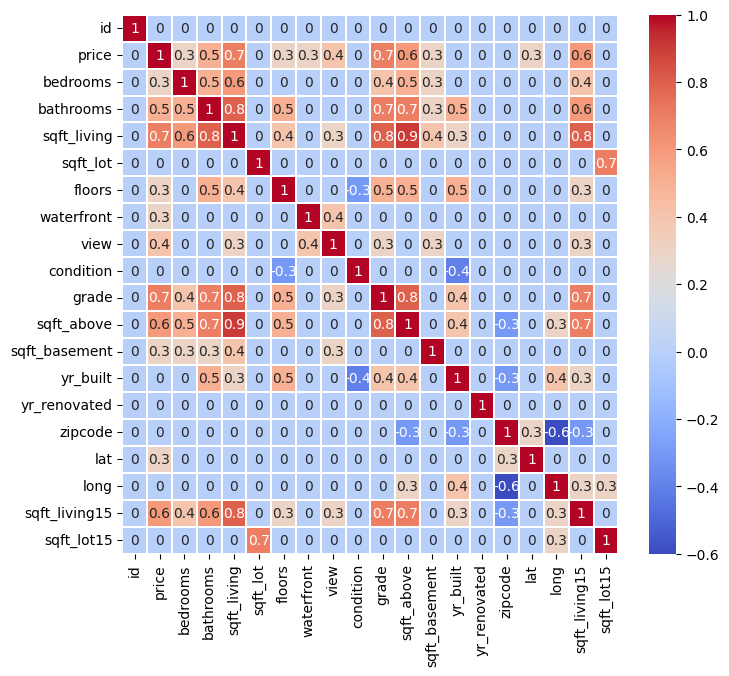

In [10]:
# Значения корреляции меньше 0.3 призаем несущественнми и не учитываем в дальнейшем анализе.
correlation_table = df.corr(numeric_only = True)
correlation_table = np.round(correlation_table, 1)
correlation_table[np.abs(correlation_table) < 0.3] = 0

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_table, annot=True,linewidths=.2, cmap='coolwarm');

Статистически значимыми показателями корреляции являются по убываннию sqft_living , grade , bathrooms, view , floors. 

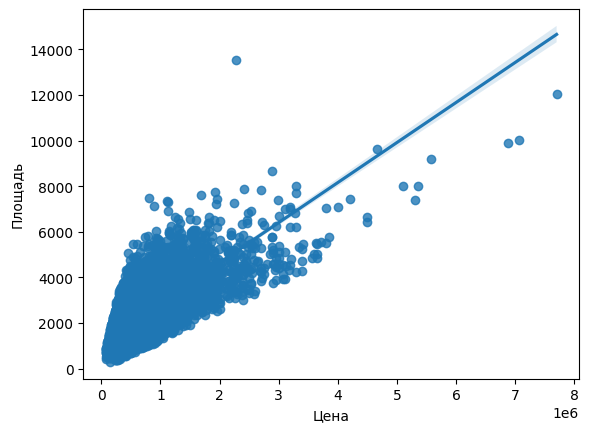

In [11]:
sns.regplot(x=df['price'],y=df['sqft_living'])
plt.xlabel('Цена')
plt.ylabel('Площадь');

Есть прямая линейная зависимость стоимости нежвижимости от площади. 

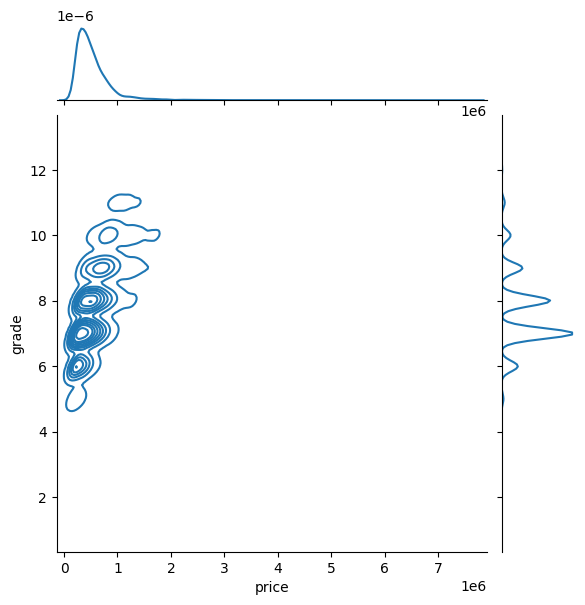

In [12]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde');

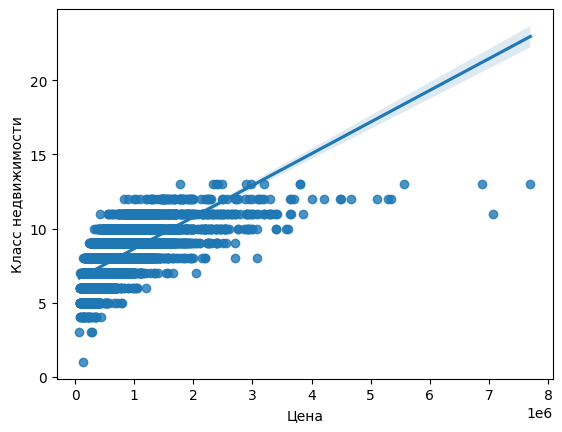

In [13]:
sns.regplot(x=df['price'],y=df['grade'])
plt.xlabel('Цена')
plt.ylabel('Класс недвижимости');

Наблюдается зависимость стоимости недвижимости о класса постройки.

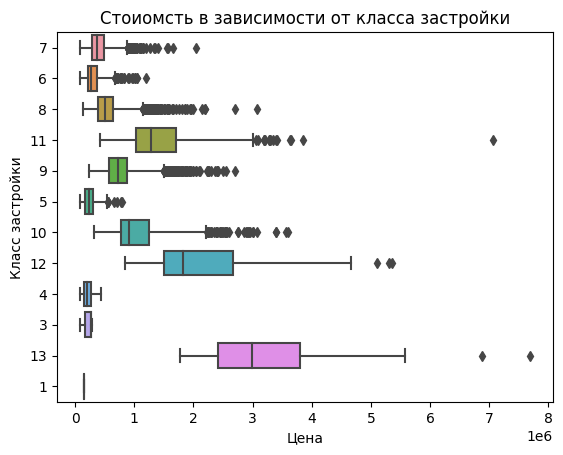

In [14]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=2);
plt.xlabel('Цена')
plt.ylabel('Класс застройки')
plt.title('Стоиомсть в зависимости от класса застройки');

Наблюдается существенный рост средней цены недвижмости в классе застройки 11 и выше. 

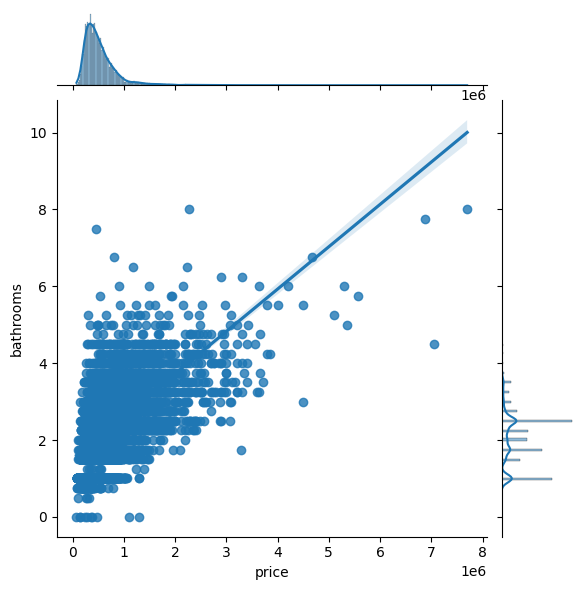

In [15]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

Наблюдается зависимость стоимости дома от количество ванных комнат/уборных. Однако это может быть фактором связаныым с общей площадью недвижимости и стандартов застройки.

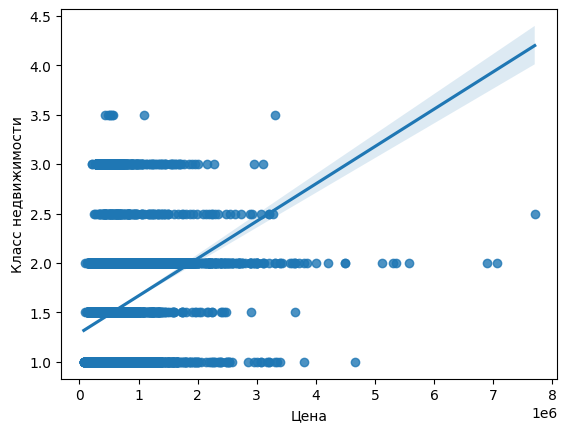

In [16]:
sns.regplot(x=df['price'],y=df['floors'])
plt.xlabel('Цена')
plt.ylabel('Класс недвижимости');

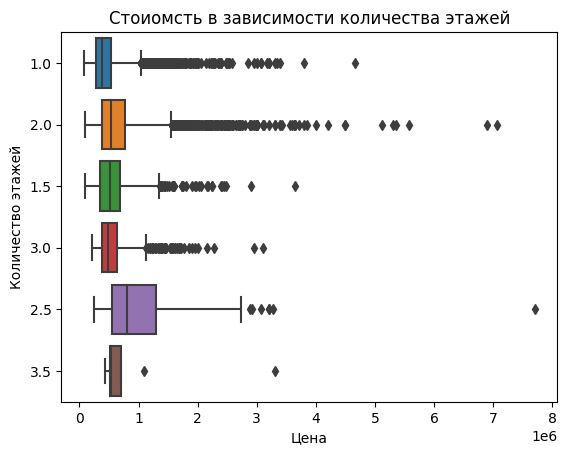

In [17]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=2);
plt.xlabel('Цена')
plt.ylabel('Количество этажей')
plt.title('Стоиомсть в зависимости количества этажей');

Наблюдается некоторая зависимость стоимости дома от количества этажей. Обращает внимание что самые высокие средние цены у домов с этажностью 2.5

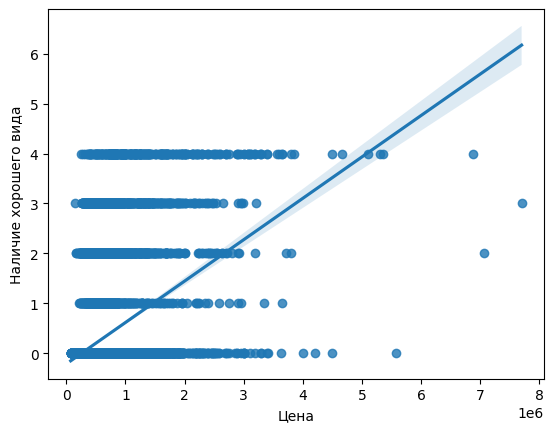

In [18]:
sns.regplot(x=df['price'],y=df['view'])
plt.xlabel('Цена')
plt.ylabel('Наличие хорошего вида');

Наблюдается зависимость стоимости недвижимости от вида на окружающую дом местность.

Общим выводом можно считать что ключевым фактором стоимости недвижимости являются площадь такого дома и его класс застройки. Так же существенное влияние оказывает наличие красивого вешнего вида. Факторы этажности и наличия дополнительных ваннных комнат так же оказывают влияние на стоимость, однако могут быть связаны с критерием общей площади домовладения. 